# Set data path

In [1]:
datapath = "../../data"

# Load the CRISPR data file

In [3]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv(os.path.join(datapath, "CRISPRGeneEffect.csv")).rename(columns={'Unnamed: 0': 'gene'}).rename(columns=lambda x: x.split(' ')[0]).set_index('gene').T
print(f'{df.isna().sum().sum()} NaN over {len(df)*len(df.columns)} values')
df

739493 NaN over 20287300 values


gene,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,ACH-000017,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
A1BG,-0.122637,0.019756,-0.107208,-0.031027,0.008888,0.022670,-0.096631,0.049811,-0.099040,-0.044896,...,-0.072582,-0.033722,-0.053881,-0.060617,0.025795,-0.055721,-0.009973,-0.025991,-0.127639,-0.068666
A1CF,0.025881,-0.083640,-0.023211,-0.137850,-0.146566,-0.057743,-0.024440,-0.158811,-0.070409,-0.115830,...,-0.237311,-0.108704,-0.114864,-0.042591,-0.132627,-0.121228,-0.119813,-0.007706,-0.040705,-0.107530
A2M,0.034217,-0.060118,0.200204,0.067704,0.084471,0.079679,0.041922,-0.003968,-0.029389,0.024537,...,-0.065940,0.079277,0.069333,0.030989,0.249826,0.072790,0.044097,-0.038468,0.134556,0.067806
A2ML1,-0.128082,-0.027417,0.116039,0.107988,0.089419,0.227512,0.039121,0.034778,0.084594,-0.003710,...,0.101541,0.038977,0.066599,0.043809,0.064657,0.021916,0.041358,0.236576,-0.047984,0.112071
A3GALT2,-0.031285,-0.036116,-0.172227,0.007992,0.065109,-0.130448,0.028947,-0.120875,-0.052288,-0.336776,...,0.005374,-0.144070,-0.256227,-0.116473,-0.294305,-0.221940,-0.146565,-0.239690,-0.116114,-0.149897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.289724,0.032983,-0.201273,-0.100344,-0.112703,0.013401,0.005124,-0.089180,-0.005409,-0.070396,...,-0.296880,-0.084936,-0.128569,-0.110504,-0.087171,0.024959,-0.119911,-0.079342,-0.043555,-0.045115
ZYG11B,-0.062972,-0.410392,-0.178877,-0.462160,-0.598698,-0.296421,-0.131949,-0.145737,-0.216393,-0.257916,...,-0.332415,-0.193408,-0.327408,-0.257879,-0.349111,0.015259,-0.289412,-0.347484,-0.335270,-0.307900
ZYX,0.074180,0.113156,-0.055349,-0.001555,0.095877,0.067705,-0.109147,-0.034886,-0.137350,0.029457,...,-0.005090,-0.218960,-0.053033,-0.041612,-0.057478,-0.306562,-0.195097,-0.085302,-0.208063,0.070671
ZZEF1,0.111244,0.234388,-0.002161,-0.325964,-0.026742,-0.232453,-0.164482,-0.175850,-0.168087,-0.284838,...,-0.188751,-0.120449,-0.267081,0.006148,-0.189602,-0.148368,-0.206400,-0.095965,-0.094741,-0.187813


# Load the map between cell lines and tissues

In [4]:
df_map = pd.read_csv(os.path.join(datapath, "Model.csv"))
print(df_map[['OncotreeLineage']].value_counts())
df_map

OncotreeLineage          
Lung                         249
Lymphoid                     211
CNS/Brain                    122
Skin                         120
Esophagus/Stomach             95
Breast                        94
Bowel                         89
Head and Neck                 84
Bone                          77
Myeloid                       77
Ovary/Fallopian Tube          75
Kidney                        73
Pancreas                      66
Peripheral Nervous System     56
Soft Tissue                   55
Biliary Tract                 44
Uterus                        41
Fibroblast                    41
Bladder/Urinary Tract         39
Normal                        39
Pleura                        35
Liver                         29
Cervix                        25
Eye                           21
Thyroid                       18
Prostate                      15
Testis                         7
Vulva/Vagina                   5
Muscle                         5
Ampulla of Vater 

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,LegacyMolecularSubtype,...,TissueOrigin,CCLEName,CatalogNumber,PlateCoating,ModelDerivationMaterial,PublicComments,WTSIMasterCellID,SangerModelID,COSMICID,LegacySubSubtype
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NIHOVCAR3_OVARY,HTB-71,NaN,NaN,NaN,2201.0,SIDM00105,905933.0,high_grade_serous
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,CCL-240,NaN,NaN,NaN,55.0,SIDM00829,905938.0,M3
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,NaN,CACO2_LARGE_INTESTINE,HTB-37,NaN,NaN,NaN,NaN,SIDM00891,NaN,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACC 11,NaN,NaN,NaN,783.0,SIDM00594,907053.0,M6
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,NaN,...,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,HEL9217,NaN,NaN,NaN,NaN,SIDM00593,NaN,M6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1916,ACH-003157,PT-QDEP9D,ABM-T0822,ABMT0822,ZIMMMPLC,Lung,Non-Cancerous,Immortalized MPLC Cells,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1917,ACH-003158,PT-nszsxG,ABM-T9220,ABMT9220,ZIMMSMCI,Muscle,Non-Cancerous,"Immortalized Smooth Muscle Cells, Intestinal",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1918,ACH-003159,PT-AUxVvV,ABM-T9233,ABMT9233,ZIMMRSCH,Hair,Non-Cancerous,Immortalized Hair Follicle Inner Root Sheath C...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919,ACH-003160,PT-AUxVvV,ABM-T9249,ABMT9249,ZIMMGMCH,Hair,Non-Cancerous,Immortalized Hair Germinal Matrix Cells,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
from HELPpy.utility.selection import filter_crispr_by_model
df = filter_crispr_by_model(df, df_map, minlines=10, line_group='OncotreeLineage')
df

gene,ACH-000001,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000015,ACH-000017,...,ACH-002693,ACH-002710,ACH-002785,ACH-002799,ACH-002800,ACH-002834,ACH-002847,ACH-002922,ACH-002925,ACH-002926
A1BG,-0.122637,0.019756,-0.107208,-0.031027,0.008888,0.022670,-0.096631,0.049811,-0.099040,-0.044896,...,-0.072582,-0.033722,-0.053881,-0.060617,0.025795,-0.055721,-0.009973,-0.025991,-0.127639,-0.068666
A1CF,0.025881,-0.083640,-0.023211,-0.137850,-0.146566,-0.057743,-0.024440,-0.158811,-0.070409,-0.115830,...,-0.237311,-0.108704,-0.114864,-0.042591,-0.132627,-0.121228,-0.119813,-0.007706,-0.040705,-0.107530
A2M,0.034217,-0.060118,0.200204,0.067704,0.084471,0.079679,0.041922,-0.003968,-0.029389,0.024537,...,-0.065940,0.079277,0.069333,0.030989,0.249826,0.072790,0.044097,-0.038468,0.134556,0.067806
A2ML1,-0.128082,-0.027417,0.116039,0.107988,0.089419,0.227512,0.039121,0.034778,0.084594,-0.003710,...,0.101541,0.038977,0.066599,0.043809,0.064657,0.021916,0.041358,0.236576,-0.047984,0.112071
A3GALT2,-0.031285,-0.036116,-0.172227,0.007992,0.065109,-0.130448,0.028947,-0.120875,-0.052288,-0.336776,...,0.005374,-0.144070,-0.256227,-0.116473,-0.294305,-0.221940,-0.146565,-0.239690,-0.116114,-0.149897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,-0.289724,0.032983,-0.201273,-0.100344,-0.112703,0.013401,0.005124,-0.089180,-0.005409,-0.070396,...,-0.296880,-0.084936,-0.128569,-0.110504,-0.087171,0.024959,-0.119911,-0.079342,-0.043555,-0.045115
ZYG11B,-0.062972,-0.410392,-0.178877,-0.462160,-0.598698,-0.296421,-0.131949,-0.145737,-0.216393,-0.257916,...,-0.332415,-0.193408,-0.327408,-0.257879,-0.349111,0.015259,-0.289412,-0.347484,-0.335270,-0.307900
ZYX,0.074180,0.113156,-0.055349,-0.001555,0.095877,0.067705,-0.109147,-0.034886,-0.137350,0.029457,...,-0.005090,-0.218960,-0.053033,-0.041612,-0.057478,-0.306562,-0.195097,-0.085302,-0.208063,0.070671
ZZEF1,0.111244,0.234388,-0.002161,-0.325964,-0.026742,-0.232453,-0.164482,-0.175850,-0.168087,-0.284838,...,-0.188751,-0.120449,-0.267081,0.006148,-0.189602,-0.148368,-0.206400,-0.095965,-0.094741,-0.187813


# Select some tissues
In this section we select only cell-lines of a specific tissue. We check that, once CRISPR datafile is reduced to a subset of total cell-lines, that there is no row (gene) in the datafile with all NaN as cell values. Inthat case we remove those rows (genes) before applying the labelling algorithm.

We start labelling genes for the `Kidney` tissue...

... then we do it for the `Lung` tissue ...

In [7]:
tissue = 'Lung'
from HELPpy.utility.selection import select_cell_lines, delrows_with_nan_percentage
from HELPpy.models.labelling import labelling
cell_lines = select_cell_lines(df, df_map, [tissue])
print(f"Selecting {len(cell_lines)} cell-lines")
# remove rows with all nans
df_nonan = delrows_with_nan_percentage(df[cell_lines], perc=95)

Selecting 119 cell-lines
Removed 512 rows from 18443 with at least 95% NaN


# Imputation

In [8]:
from HELPpy.preprocess.imputer import imputer_knn
df_nonan_ip = imputer_knn(df_nonan)

# Remove outliers

/Users/maurizio/miniconda3/lib/python3.10/site-packages/scipy/spatial/distance.py:1023: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[nan, nan, 40.53531584374171, 46.70298840940362, nan, 39.40322432687373, nan, 102.98146676296726, nan, nan, nan, 109.33442740477449, nan, nan, nan, nan, nan, nan, nan, 35.37404860248974, nan, 142.21946156671106, nan, 79.90122217328117, 120.01621005127869, 54.37543433907903, nan, 106.8172229743016, 53.33053150880437, 123.12933708573007, nan, 67.12536221668036, nan, 94.87084857211279, 65.9106252876001, 78.30336134647213, 26.333758092810818, 85.58610551581666, nan, nan, 70.46303408261396, nan, nan, nan, nan, nan, nan, nan, nan, 65.0991777345723, 38.44930727102753, 42.25656926248559, nan, nan, nan, 20.95925671983381, nan, nan, 157.19217644897938, 33.936895116316244, nan, 61.787563436864524, nan, nan, nan, 144.62735545690447, nan, 86.5480777500146, 74.3791675535383, 90.68577942142328, 36.94195372227576, 41.47688861617943, nan, 34.87580426542372, 89.83548228794834, nan, 63.81896373777625, nan, 58.54827327501953, 54.86675442575499, nan, 162.503577403501, nan, 96.37310222474721, nan, nan, nan,

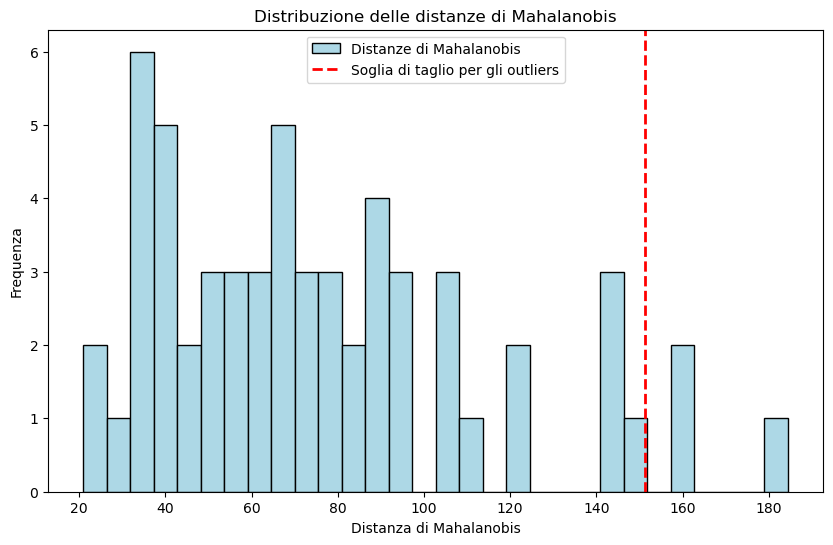

Rimosse 3 colonne perché outliers (distanza Mahalanobis > 151.2480758576962)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.spatial import distance

def mahalanobis_outliers(data):
    """
    Identifica gli outliers utilizzando la distanza di Mahalanobis.
    :param data: DataFrame con le variabili reali
    :return: Lista di indici degli outliers
    """
    # Rimuovi le righe con valori mancanti
    data_no_na = data.dropna()

    # Calcola la matrice di covarianza
    cov_matrix = np.cov(data_no_na, rowvar=False)
    # Calcola la matrice di covarianza inversa
    cov_inv = np.linalg.inv(cov_matrix)
    # Calcola la distanza di Mahalanobis utilizzando la funzione di scipy
    mean = np.mean(data_no_na, axis=0)
    mahalanobis_distances = [distance.mahalanobis(row, mean, cov_inv) for row in data_no_na.to_numpy()]
    print(mahalanobis_distances)
    # Definisci una soglia per identificare gli outliers (ad esempio, utilizzando una distribuzione chi-quadro)
    threshold = np.nanpercentile(mahalanobis_distances, 95)  # Puoi regolare il percentile in base alle tue esigenze

    # Visualizza la distribuzione delle distanze e la soglia di taglio
    plt.figure(figsize=(10, 6))
    plt.hist(mahalanobis_distances, bins=30, edgecolor='black', color='lightblue', label='Distanze di Mahalanobis')
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label='Soglia di taglio per gli outliers')
    plt.xlabel('Distanza di Mahalanobis')
    plt.ylabel('Frequenza')
    plt.title('Distribuzione delle distanze di Mahalanobis')
    plt.legend()
    plt.show()

    # Trova gli outliers negli indici originali
    outliers_indices = data.index[data.isna().any(axis=1)].union(data_no_na.index[mahalanobis_distances > threshold])

    return outliers_indices, threshold

# Identificazione degli outliers utilizzando la distanza di Mahalanobis
outliers_columns, limit = mahalanobis_outliers(df_nonan_ip.T)
df_nonan_nool = df_nonan_ip.drop(columns=outliers_columns)
print(f"Rimosse {len(outliers_columns)} colonne perché outliers (distanza Mahalanobis > {limit})")

In [10]:
df_nonan_nool = df_nonan_ip.drop(columns=outliers_columns)
df_nonan_nool

gene,ACH-000012,ACH-000015,ACH-000021,ACH-000029,ACH-000030,ACH-000035,ACH-000143,ACH-000161,ACH-000176,ACH-000187,...,ACH-001386,ACH-001549,ACH-002035,ACH-002051,ACH-002077,ACH-002156,ACH-002522,ACH-002526,ACH-002531,ACH-002650
A1BG,-0.096631,-0.099040,-0.115407,-0.010927,0.141588,-0.126955,-0.074537,-0.005710,0.019219,-0.055518,...,-0.010757,-0.104869,-0.185896,0.017155,-0.076636,-0.171598,0.035977,-0.172501,-0.033574,-0.056369
A1CF,-0.024440,-0.070409,-0.181106,-0.069569,-0.235507,-0.041039,-0.201004,-0.068009,-0.071535,-0.007234,...,-0.153395,-0.058616,-0.170929,-0.042142,-0.106737,0.050156,-0.055682,0.266869,-0.090805,-0.104222
A2M,0.041922,-0.029389,-0.020465,0.001538,0.012365,0.029849,0.028630,0.119970,-0.017309,-0.073195,...,0.111502,0.044334,0.219383,0.078776,0.034575,0.088341,0.244112,-0.063692,0.006704,0.118243
A2ML1,0.039121,0.084594,-0.025030,0.059103,0.060239,0.037083,-0.038309,0.116496,0.251856,0.090424,...,0.112639,-0.001246,0.037265,0.153954,-0.083971,0.336780,0.143028,-0.043568,0.042942,0.151456
A3GALT2,0.028947,-0.052288,-0.109040,-0.236308,-0.130461,0.071862,-0.092754,-0.222069,0.042737,-0.134045,...,-0.281219,-0.160658,-0.198531,-0.043895,-0.400027,-0.156647,-0.159812,0.071649,-0.201247,-0.114598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.005124,-0.005409,-0.066436,0.054278,-0.072610,-0.107669,0.068643,-0.033630,-0.152424,-0.017307,...,-0.040707,-0.066158,-0.010060,-0.067393,-0.163113,-0.150823,-0.100644,0.224465,0.048791,-0.012245
ZYG11B,-0.131949,-0.216393,-0.368909,-0.130836,-0.329001,-0.353797,-0.207713,-0.120313,-0.188664,-0.036838,...,-0.266762,-0.198401,-0.377490,-0.066518,-0.273882,-0.233026,-0.260728,-0.230549,-0.234106,-0.215543
ZYX,-0.109147,-0.137350,-0.127135,0.080878,-0.011675,0.015859,0.021795,-0.055467,-0.076744,0.057199,...,0.001814,0.045149,0.013886,0.059225,-0.201100,0.105959,-0.182085,-0.122084,0.065003,-0.063077
ZZEF1,-0.164482,-0.168087,-0.249770,-0.169796,-0.177205,-0.068669,0.079571,-0.115627,-0.050663,-0.229357,...,-0.216575,-0.168758,-0.211387,-0.361345,-0.135362,-0.381383,-0.198027,-0.162206,-0.165964,-0.240763


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch import Tensor
from torch.utils.data import DataLoader, TensorDataset
from torchvision.transforms import ToTensor
import pytorch_lightning as pl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pytorch_lightning.loggers import CSVLogger

csv_logger = CSVLogger(
    save_dir='../working/',
    name='csvlogging',
    version = 'last'
)

# Genera un dataset di esempio
torch.manual_seed(42)

# Definisci come y cresce o decresce in base alle variabili


# Aggiungi la colonna target al dataset delle variabili
variables = list(df_nonan_nool.columns)
dfsc = df_nonan_nool.assign(Target=df_nonan_nool.sum(axis=1))

# Converti il DataFrame in un tensore PyTorch
# Normalizzazione dei dati
scaler = MinMaxScaler()
data = scaler.fit_transform(dfsc.values)
data = torch.tensor(data, dtype=torch.float32)
num_samples = len(data)

# Divisione del dataset in train e test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Creazione dei DataLoader per l'addestramento
train_dataset = TensorDataset(train_data[:, :-1], train_data[:, -1])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Inizializzazione del modello e dell'ottimizzatore
input_dim = len(variables)
encoding_dim = 1

#encoder = nn.Sequential(nn.Linear(input_dim, int(input_dim/2)), nn.ReLU(), nn.Linear(int(input_dim/2), encoding_dim))
#decoder = nn.Sequential(nn.Linear(encoding_dim, int(input_dim/2)), nn.ReLU(), nn.Linear(int(input_dim/2), input_dim))
encoder = nn.Sequential(nn.Linear(input_dim, encoding_dim), nn.ReLU())
decoder = nn.Sequential(nn.ReLU(), nn.Linear(encoding_dim, input_dim))
class LitAutoEncoder(pl.LightningModule):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        x = x.view(x.size(0), -1)
        z = self.encoder(x)
        x_hat = self.decoder(z)
        loss = custom_loss(z, y, x, x_hat)
        # Include extra logging here
        self.log("Loss", loss, on_step=False, on_epoch=True)
        return loss
    
    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=0.001)
        return optimizer
    
# Funzione di perdita personalizzata basata sulle correlazioni
def custom_loss(encoded_output, target, input_data, decoder_output):
    features = input_data[:, :-1]
    target = target.view(-1, 1)
    # Calcola la correlazione tra le variabili e l'indice reale
    real_correlations = [torch.nn.functional.cosine_similarity(features[:, i].unsqueeze(1), target.unsqueeze(1), dim=0) for i in range(features.shape[1])]
    # Calcola la correlazione tra le variabili predette e l'indice predetto
    pred_correlation = torch.nn.functional.cosine_similarity(encoded_output[:, -1].unsqueeze(1), encoded_output[:, :-1], dim=0)
    # Calcola la differenza tra le correlazioni reali e predette
    correlation_diff = torch.sum((torch.stack(real_correlations) - pred_correlation)**2)
    # Aggiungi la penalità sulla differenza delle correlazioni alla perdita totale
    loss = nn.MSELoss()(encoded_output, target) + correlation_diff
    return loss

epochs = 20
ae = LitAutoEncoder(encoder, decoder)
trainer = pl.Trainer(max_epochs=epochs, logger=[csv_logger])
trainer.fit(model=ae, train_dataloaders=train_loader)
# Aggiungi l'output del layer latente al tuo dataset
latent_output = encoder(data[:, :-1])
data_with_latent = torch.cat((data[:, :-1], latent_output), dim=1)

# Stampa le prime righe del dataset con l'output del layer latente
print("Dataset con l'output del layer latente:")
data_windex = pd.DataFrame(data_with_latent.detach().numpy(), columns=variables+['ACH-all'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0, epochs, step=5)), 
# Visualizziamo l'andamento del addestramento dell'autoencoder
plt.plot(pd.read_csv('../working/csvlogging/last/metrics.csv')[-epochs:]['Loss'].reset_index().drop(columns=['index']))
data_windex

OSError: dlopen(/Users/maurizio/miniconda3/lib/python3.10/site-packages/torchaudio/lib/libtorchaudio.so, 0x0006): Symbol not found: __ZN2at8internal15invoke_parallelExxxRKNSt3__18functionIFvxxEEE
  Referenced from: <27100630-351E-3677-A9E1-E90945A87662> /Users/maurizio/miniconda3/lib/python3.10/site-packages/torchaudio/lib/libtorchaudio.so
  Expected in:     <D4011B65-B3A7-3178-B29B-9F56D9359249> /Users/maurizio/miniconda3/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib

In [ ]:
from skimage.filters import threshold_otsu
limit = threshold_otsu(data_windex['ACH-all'].values)
dfsc['label'] = data_windex['ACH-all'].apply(lambda x: 'NE' if x > limit else 'E').values
dfsc

gene,ACH-000012,ACH-000015,ACH-000021,ACH-000029,ACH-000030,ACH-000035,ACH-000143,ACH-000161,ACH-000176,ACH-000187,...,ACH-002035,ACH-002051,ACH-002077,ACH-002156,ACH-002522,ACH-002526,ACH-002531,ACH-002650,Target,label
A1BG,-0.096631,-0.099040,-0.115407,-0.010927,0.141588,-0.126955,-0.074537,-0.005710,0.019219,-0.055518,...,-0.185896,0.017155,-0.076636,-0.171598,0.035977,-0.172501,-0.033574,-0.056369,-2.464104,NE
A1CF,-0.024440,-0.070409,-0.181106,-0.069569,-0.235507,-0.041039,-0.201004,-0.068009,-0.071535,-0.007234,...,-0.170929,-0.042142,-0.106737,0.050156,-0.055682,0.266869,-0.090805,-0.104222,-9.876409,NE
A2M,0.041922,-0.029389,-0.020465,0.001538,0.012365,0.029849,0.028630,0.119970,-0.017309,-0.073195,...,0.219383,0.078776,0.034575,0.088341,0.244112,-0.063692,0.006704,0.118243,3.952428,NE
A2ML1,0.039121,0.084594,-0.025030,0.059103,0.060239,0.037083,-0.038309,0.116496,0.251856,0.090424,...,0.037265,0.153954,-0.083971,0.336780,0.143028,-0.043568,0.042942,0.151456,9.295718,NE
A3GALT2,0.028947,-0.052288,-0.109040,-0.236308,-0.130461,0.071862,-0.092754,-0.222069,0.042737,-0.134045,...,-0.198531,-0.043895,-0.400027,-0.156647,-0.159812,0.071649,-0.201247,-0.114598,-13.493791,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.005124,-0.005409,-0.066436,0.054278,-0.072610,-0.107669,0.068643,-0.033630,-0.152424,-0.017307,...,-0.010060,-0.067393,-0.163113,-0.150823,-0.100644,0.224465,0.048791,-0.012245,-4.412321,NE
ZYG11B,-0.131949,-0.216393,-0.368909,-0.130836,-0.329001,-0.353797,-0.207713,-0.120313,-0.188664,-0.036838,...,-0.377490,-0.066518,-0.273882,-0.233026,-0.260728,-0.230549,-0.234106,-0.215543,-28.120018,NE
ZYX,-0.109147,-0.137350,-0.127135,0.080878,-0.011675,0.015859,0.021795,-0.055467,-0.076744,0.057199,...,0.013886,0.059225,-0.201100,0.105959,-0.182085,-0.122084,0.065003,-0.063077,0.383134,NE
ZZEF1,-0.164482,-0.168087,-0.249770,-0.169796,-0.177205,-0.068669,0.079571,-0.115627,-0.050663,-0.229357,...,-0.211387,-0.361345,-0.135362,-0.381383,-0.198027,-0.162206,-0.165964,-0.240763,-19.725903,NE


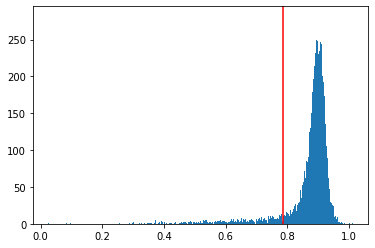

In [ ]:
import matplotlib.pyplot as plt
data_windex['ACH-all'].values
plt.hist(data_windex['ACH-all'].values, bins=1024)
plt.axvline(x = limit, color = 'r', label = 'threshold')

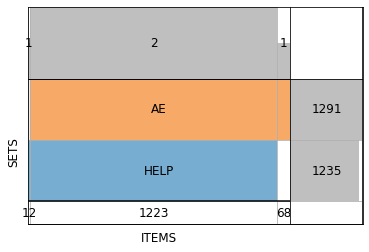

In [ ]:
import matplotlib.pyplot as plt
from supervenn import supervenn
help = pd.read_csv(os.path.join(datapath, "Lung_HELP.csv"), index_col=0)
supervenn([set(help[help['label'] == 'E'].index),set(dfsc[dfsc['label'] == 'E'].index)], ['HELP', 'AE'])